Iteration 1:
  Assigned Clusters: [[(20, 9), (20, 8), (20, 9), (18, 9), (20, 9)], [(21, 9), (22, 17), (25, 12), (26, 14)], [(15, 7)]]
  New Centroids: [(19.6, 8.8), (23.5, 13.0), (15.0, 7.0)]


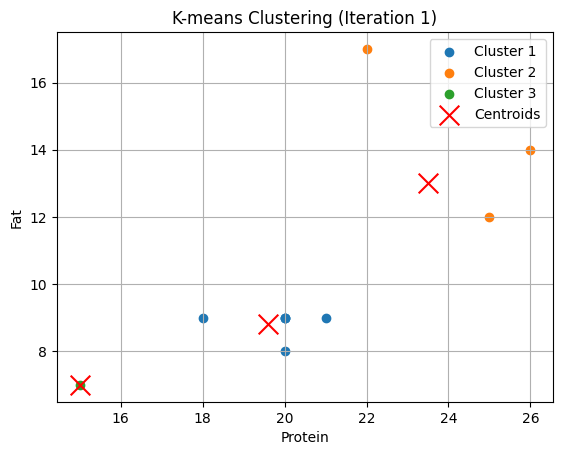

Iteration 2:
  Assigned Clusters: [[(20, 9), (21, 9), (20, 8), (20, 9), (18, 9), (20, 9)], [(22, 17), (25, 12), (26, 14)], [(15, 7)]]
  New Centroids: [(19.833333333333332, 8.833333333333334), (24.333333333333332, 14.333333333333334), (15.0, 7.0)]


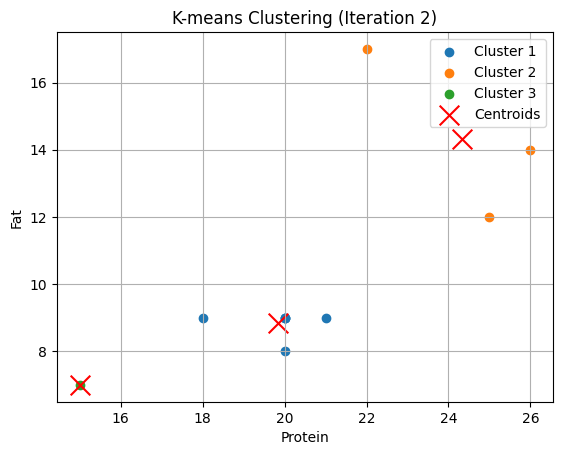

Iteration 3:
  Assigned Clusters: [[(20, 9), (21, 9), (20, 8), (20, 9), (18, 9), (20, 9)], [(22, 17), (25, 12), (26, 14)], [(15, 7)]]
  New Centroids: [(19.833333333333332, 8.833333333333334), (24.333333333333332, 14.333333333333334), (15.0, 7.0)]


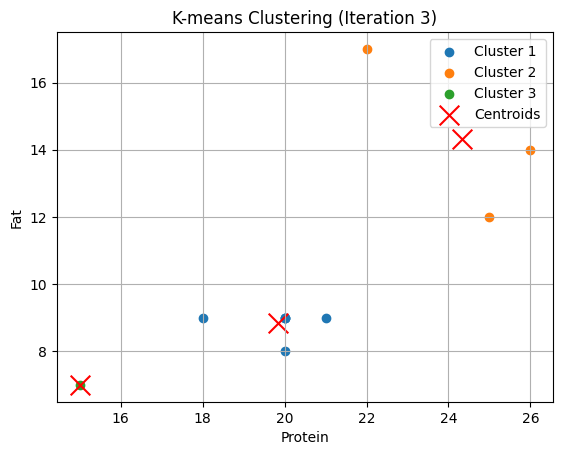

  Centroids have not changed. Converged.
Final clusters:
Cluster 1: [(20, 9), (21, 9), (20, 8), (20, 9), (18, 9), (20, 9)]
Cluster 2: [(22, 17), (25, 12), (26, 14)]
Cluster 3: [(15, 7)]
Final centroids:
[(19.833333333333332, 8.833333333333334), (24.333333333333332, 14.333333333333334), (15.0, 7.0)]


In [2]:
import matplotlib.pyplot as plt
data = [(20, 9),(21, 9),(15, 7),(22, 17),(20, 8),(25, 12),(26, 14),(20, 9),(18, 9),(20, 9)]
centroids = [(20, 9),  (21, 9),  (15, 7)   ]
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid_index = distances.index(min(distances))
        clusters[closest_centroid_index].append(point)
    return clusters
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:
            avg_x = sum(point[0] for point in cluster) / len(cluster)
            avg_y = sum(point[1] for point in cluster) / len(cluster)
            new_centroids.append((avg_x, avg_y))
        else:
            new_centroids.append((0, 0))
    return new_centroids
def plot_clusters(data, centroids, iteration):
    plt.figure()
    for i, cluster in enumerate(clusters):
        if cluster:
            plt.scatter(*zip(*cluster), label=f'Cluster {i + 1}')
    plt.scatter(*zip(*centroids), color='red', marker='x', s=200, label='Centroids')
    plt.title(f'K-means Clustering (Iteration {iteration})')
    plt.xlabel('Protein')
    plt.ylabel('Fat')
    plt.legend()
    plt.grid(True)
    plt.show()
def k_means(data, centroids, max_iterations=100):
    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}:")
        clusters = assign_clusters(data, centroids)
        print(f"  Assigned Clusters: {clusters}")

        new_centroids = update_centroids(clusters)
        print(f"  New Centroids: {new_centroids}")

        plot_clusters(data, new_centroids, iteration + 1)

        if new_centroids == centroids:
            print("  Centroids have not changed. Converged.")
            break
        centroids = new_centroids
    return clusters, centroids
clusters, final_centroids = k_means(data, centroids)
print("Final clusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {cluster}")
print("Final centroids:")
print(final_centroids)

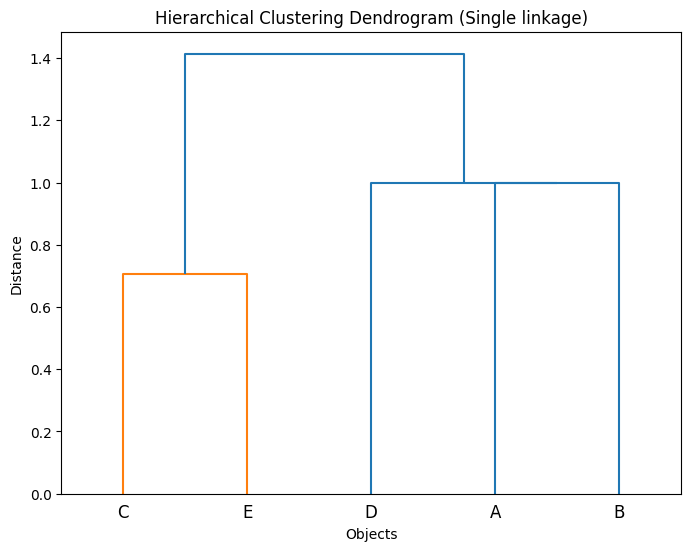

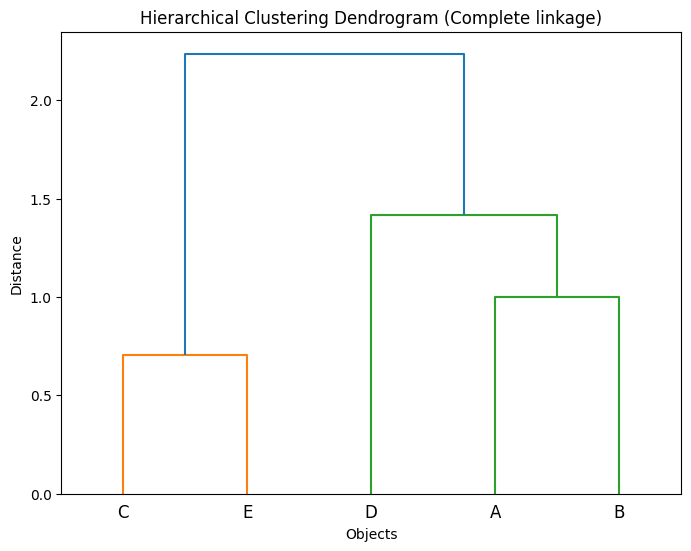

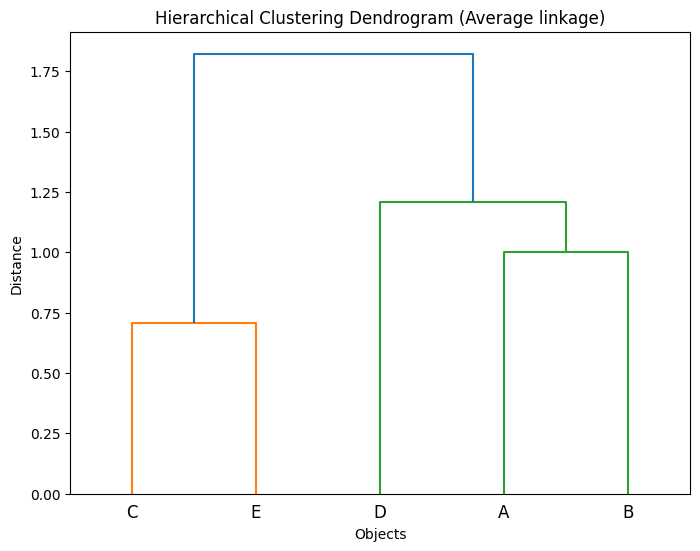

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
objects = ['A', 'B', 'C', 'D', 'E']
X = [2, 3, 1, 3, 1.5]
Y = [2, 2, 1, 1, 0.5]
points = list(zip(X, Y))
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
def distance_matrix(points):
    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist_matrix[i][j] = dist_matrix[j][i] = euclidean_distance(points[i], points[j])
    return dist_matrix
dist_matrix = distance_matrix(points)
def print_distance_matrix(matrix, objects):
    print(f"Distance Matrix for {objects}:")
    print(np.round(matrix, 2), "\n")
def plot_dendrogram(linkage_method, method_name):
    Z = linkage(points, method=linkage_method)
    plt.figure(figsize=(8, 6))
    plt.title(f'Hierarchical Clustering Dendrogram ({method_name} linkage)')
    plt.xlabel('Objects')
    plt.ylabel('Distance')
    dendrogram(Z, labels=objects)
    plt.show()
plot_dendrogram('single', 'Single')
plot_dendrogram('complete', 'Complete')
plot_dendrogram('average', 'Average')